In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Convex sets

## Affine and convex sets
### Lines and line segments

Let $x_1, x_2$ be points in $\mathbb{R}^n$. We can think of a line segment as 

\begin{equation}
y = \theta x_1 + (1-\theta) x_2
\label{eq:line_seg}
\end{equation}

where $\theta$ is a parameter that varies on $[0,1]$. Allowing $\theta$ to vary outside that range sweeps out a line.

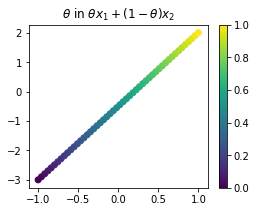

In [2]:
θ = np.linspace(0,1,50)
x1, x2 = np.array([1., 2]), np.array([-1, -3])
pts = x1*θ[:,None] + (1-θ[:,None])*x2

# plot result
fig, ax = plt.subplots(1, 1, figsize=(4,3))
plt.scatter(pts[:,0], pts[:,1], c=θ)
plt.colorbar()
plt.title(r'$\theta$ in $\theta x_1 + (1-\theta)x_2$')
plt.show()

### Affine sets

**Definition**

- Loosely, a set $C$ is *affine* if the __entire line__ through any two points in $C$ lies in $C$.

- Formally, a set $C\subseteq\mathbb{R}^n$ is *affine* if, for any $x_1, x_2 \in \mathbb{R}^n$ and $\theta\in\mathbb{R}$, the set $\theta x_1 + (1-\theta)x_2 \in C$

![Affine examples](convex_img/affine_example.jpg)

**Related concept: affine combination**

A point of the form $\theta_1 x_1 + \ldots + \theta_k x_k$ where $\theta_1 + \ldots + \theta_k = 1$ is called an *affine combination* of the points $x_1,\ldots,x_n$.

- Our check for an affine set was to see whether for any two points $x_1, x_2 \in C$, $$\theta x_1 + (1-\theta)x_2$$ is also in $C$; since $\theta + (1-\theta) = 1$. So this is a generalization that extends to $k$ points. 

### Convex sets

**Definition:**
- Loosely, a set $C$ is *convex* if the line segment between any two points in $C$ also lies in $C$.
- Geometrically, for any two points in a set, if the line segment connecting them always lies in the set, the set is convex.
- Formally, for any $x_1,x_2\in C$ and any $\theta$ with $0\leq\theta\leq1$, the point $\theta x_1 + (1-\theta)x_2 \in C$.

![Convexity example](convex_img/convex_set_examples.jpg)

Similarly, a point $\theta_1 x_1 + \ldots \theta_k x_k$ where $\theta^T \mathbf{1} = 1$ (slight abuse of notation, where we consider all $\theta_i$ as a vector) and $\theta_i \geq 0$, is called a *convex combination* of the points $x_1, \ldots, x_k$.

by choosing some points $x_1, x_2, x_3, x_4$ and appropriate $\theta$, we can sweep out what the convex combination looks like.

In [3]:
# choose 4 points in R^2
x = np.array([[1,   1  ],
              [2,   1  ],
              [1.5, 2  ],
              [1.7, 0.7]])
n = 10000
pts = np.zeros((n, 2))
for i in range(n):
    θ = np.random.random(4)
    θ *= 1/np.sum(θ)          # ensure sum to 1
    pts[i,:] = np.dot(θ.T, x)

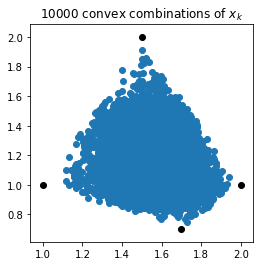

In [4]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(pts[:,0], pts[:,1])
ax.scatter(x[:,0], x[:,1], c='k')
ax.set_title(r'{} convex combinations of $x_k$'.format(n))
plt.show()

We see that it's sweeping out the interior region defined by the four  points. Continuing to make this plot for arbitrarily many convex points would give the *convex hull* of the points $x_k$.

Formally, the *convex hull* of a set $C$, $\text{conv }C$ is the set of all convex combinations of the points in $C$
$$\text{conv }C = \{\theta_1 x_1 + \ldots + \theta_k x_k | x_i \in C,\, \theta_i \geq 0,\, \theta^T\mathbf{1} = 1\} $$

**Examples of convex sets**

1. The empty set $\emptyset$ is convex
2. Any singleton set $\{x_0\}$ is convex
3. Any line is affine, hence convex
4. Any line segment is convex, but not affine (unless it's a single point)
5. A ray is convex
6. Any subspace is affine (and, in fact, a convex cone)

**The outer product of two convex sets is convex.**

Let $S$ and $T$ be convex sets and take $\theta\in [0,1]$. Let $(x_1,y_1),\, (x_2,y_2)$ be arbitrary points in $S\times T$. Then $x_1, x_2 \in S$; and since $S$ is convex, $\theta x_1 + (1-\theta)x_2 \in S$. Similarly, $y_1, y_2 \in T$, and $\theta y_1 + (1-\theta) y_2 \in T$. Therefore 

\begin{equation}
\left(\theta x_1 + (1-\theta)x_2,\, \theta y_1 + (1-\theta)y_2\right) \in S
\times T.
\end{equation}

and , which shows that $\theta(x_1,y_1) + (1-\theta)(x_2,y_2) \in S\times T$ and the outer product is convex.


**Show that a set is convex if and only if its intersection with any line is convex. Show that a set is affine if and only if its intersection with any line is affine.**

We only prove the convex part.

__proof.__ 

$(\Rightarrow)$ Suppose that a set $C$ is convex. Let the set $L$ represent an arbitrary line. If the intersection is the empty set $\emptyset$, we are done (since the empty set is convex), so suppose the intersection $C \cap L$ is non-empty. Let $x_1, x_2 \in C \cap L$, which implies that $x_1, x_2 \in C$ and the intersection is convex.

$(\Leftarrow)$ Suppose that the intersection of any line with a set $C$ is convex. Choose any $x_1, x_2 \in C$. Then the line segment $LS = \theta x_1 + (1-\theta) x_2$ with $0\leq \theta\leq 1$ represents a convex subset of the intersection of the line $\theta x_1 + (1-\theta)x_2$ with $\theta\in\mathbb{R}$, hence all points in $LS$ lie in $C$. Since choice of $x_1, x_2$ was arbitrary, our conclusion holds for any $x_1, x_2$ and we have that $C$ is convex.

## Cones

**Definition:**

A set $C$ is called a *cone* if for every $x\in C$ and $\theta\geq 0$ we have that $\theta x \in C$.

- this implies that every cone contains $0$ by choosing $\theta=0$.
- if you take vector pointing to any $x \in C$, all points from the origin to $x$ are in the cone.

**Convex cones**

A set $C$ is a *convex cone* if it is convex and a cone; namely, for any $x_1, x_2 \in C$ and $\theta_1, \theta_2 \geq 0$, we have that $\theta_1 x_1 + \theta_2 x_2 \in C$. 

![Convex cone](convex_img/convex_cone.png)

**Example: positive semidefinite cone**

We use $\mathbf{S}^n$ to denote the set of symmetric $n\times n$ matrices.
The set $\mathbf{S}^n_+ = \left\{X\in \mathbf{S}^n \mid X \succeq 0 \right\}$ is
the set of symmetric positive semidefinite matrices, that is

\begin{equation}
X\in \mathbf{S}^n_+ \iff z^T X z \geq 0 \; \text{ for all } z
\end{equation}

This is a convex cone. If $\theta_1,\theta_2\geq 0$ and $A,B\in \mathbf{S}^n_+$,
then

\begin{equation}
z^T\left(\theta_1 A + \theta_2 B\right)z = 
\theta_1\underbrace{ z^T A z}_{\geq 0} + 
\theta_2\underbrace{ z^T B z}_{\geq 0}  \geq 0 
\end{equation}

and we have shown convexity.






**Non-convex cones**

Can cones be non-convex? Yes, because the strict definition of a cone can specify a "shell" of a cone or a bidirectional cone, both of which violate convexity. Roughly, if a cone is one-directional and contains its interior, then it's a convex cone. Below are two examples of non-convex cones: the union of opposing quadrants in $\mathbb{R}^2$ and the graph of $|x|$.

![Non-convex cones](convex_img/non_convex_cones.jpg)

**Conic hulls**

A point $\theta_1 x_1 +\ldots + \theta_k x_k$ with $\theta_1,\ldots,\theta_k \geq 0$ is called a *conic combination* of the points $x_i$.

Similarly to an convex hull, we can define the *conic hull* of a set $C$ as the set of all conic combinations of points in $C$,
$$ \{\theta_1 x_1 +\ldots + \theta_k x_k \,| \, x_i\in C,\, \theta_i \geq 0\} $$

Intuitively, the conic hull is the convex cone which encloses the set $C$.

<img src="convex_img/ch2_ex_conic_hull.png" width=400>

## Hyerplanes and halfspaces

**Hyperplanes**

a hyperplane is a set of the form $\{x\,|\, a^T x = b\}$ where $a, x\in \mathbb{R}^n$ and where $b\in \mathbb{R}$.

![Hyperplane](convex_img/hyperplane_fig.png)

There are a few geometric interpretations of the hyperplane $\{x\,|\, a^T x = b\}$

- if $b=0$, then this is the set of all vectors that are orthogonal to $a$; that is, the solution can be thought of as the plane defined by the normal vector $a$.
- if $b\neq 0$, then the plane in the $b=0$ case is offset from the origin to the y-intercept. 

We can think of it like   

\begin{equation}
\{x\,|\, a^Tx - b = 0\} = \{x \,|\, a^T(x - x_0) = 0\},
\end{equation}

where $x_0$ is any vector such that $a^T x_0 = b$. This makes sense, because *any* element of the original offset hyperplane can be subtracted to recover the hyperplane passing through the origin.
    
<img src="../img/6.036_hyperplane.png" width=400>

The perpendicular offset of the origin $d$ can be computed by noting that the vector $\mathbf{0} + da$ lies on the hyperplane. Hence
$$
a^T(0 + d a) = b \Rightarrow d = \frac{b}{a^T a}
$$

**Halfspaces**

A hyperplane divides $\mathbb{R}^n$ into two halfspaces. A (closed) halfspace is a set of the form

\begin{equation}
\left\{x \mid a^T x \leq b\right\}
\end{equation}
where $a\neq 0$. Halfspaces are convex but not affine.


![Halfspace](convex_img/halfspace.png)

A halfspace is not a vector space. It is not closed under scalar multiplication.

## Polyhedra

A polyhedron is the solution set of a finite number of linear inequalities and
equalities. 

\begin{equation}
\mathcal{P} = \left\{x \mid a_j^Tx \leq b_j,\; j=1,\ldots,m, \;
c_j^T x = d_j, \; j=1,\ldots,p\right\}
\label{eq:polylong}
\end{equation}

Instead of using (\ref{eq:polylong}), it will be convenient to use the notation

\begin{equation}
\mathcal{P} = \left\{Ax \preccurlyeq b,\; Cx = d\right\}
\label{eq:polyshort}
\end{equation}





![Polyhedron](convex_img/polyhedra.png)

## Convexity preserving operations

### Intersections

The intersection of any number of convex sets is convex.

**Which of the following sets are convex?**

A *slab*, i.e., a set of the form $\left\{x \in \mathbf{R}^n \mid \alpha\leq a^T x \leq \beta\right\}$.

- A slab is the intersection of two halfspaces, and is therefore convex.
  
  
A *rectangle*, i.e., a set of the form $\left\{x \in \mathbf{R}^n \mid \alpha_i \leq x_i \leq \beta_i,\, i=1,\ldots,n\right\}$. 

- This is also the intersection of halfspaces, one for each boundary of the rectangle. Therefore it is also convex, and also a polyhedron.


A *wedge*, i.e., $\left\{x\in \mathbf{R}^n\mid a_1^T x \leq b_1,\,  a_2^T x \leq b_2\right\}$.

- This is again the intersection of two halfspaces and is therefore convex as well as a polyhedron.
  
  
*The set of points closer to a given point than a given set*, i.e.,

$$\left\{x \mid \left\Vert x-x_0\right\Vert_{2}^{} \leq \left\Vert
x-y\right\Vert_{2}^{} \text{ for all } y\in S\right\}.$$

where $S\subseteq \mathbf{R}^n$.

- For each point $y \in S$, the set of points closer to $x_0$ than to $y$ defines a halfspace. Take the intersection of all these halfspaces (possibly uncountably infinite intersections) and convexity is preserved. The set is convex.








### Affine functions

A function $f\colon \mathbf{R}^n\to \mathbf{R}^m$ is *affine* if it is a sum of a linear function and a constant, i.e., if it has the form $f(x) = Ax +b$ where $A\in \mathbf{R}^{m\times n}$ and $b\in \mathbf{R}^m$.

**Affine functions preserve convexity, which means:**

The image of a convex set $C\subseteq \mathbf{R}^{n}$ under an affine mapping $f$ is convex. 

\begin{equation}
C \subseteq \mathbf{R}^{n} \text{ convex } \Rightarrow f(C) = \left\{f(x) \mid x
\in C \right\} \text{ is convex}
\end{equation}

![Affine image](convex_img/aff_func.jpg)

It also works in reverse. The *inverse image* $f^{-1}(S)$ of a convex set under
$f$ is convex.

\begin{equation}
S \subseteq \mathbf{R}^{m} \text{ convex } \Rightarrow f^{-1}(S) =
\left\{x\in \mathbf{R}^{n} \mid f(x) \in S \right\} \text{ is convex }
\end{equation}

![Affine inverse image](convex_img/aff_inv.jpg)

We can actually get quite a bit of mileage out of this simple result.

**Examples**

*Solution set of a linear matrix inequality*

Suppose we have matrices $B, A_i \in \mathbf{S}^m$, for $i=1,\ldots,n$ and $x\in \mathbf{R}^n$. A *linear matrix inequality* is the condition

\begin{equation}
A(x) = x_1 A_x + \ldots + x_n A_n \preceq B
\end{equation}

We can show that the solution set, $\left\{x \mid A(x) \preceq B\right\}$ is
convex by using an affine function argument. If $A(x) \preceq B$ then $B- A(x)
\succeq 0$, which means that $B - A(x) \in S_+^m$. We define a new function $f(x) = B - A(x)$, which is affine, and the set
$S^m_+$ is convex. So

\begin{align}
f^{-1}(S^m_+) 
&= \left\{x\in \mathbf{R}^{n}\mid  f(x) \in S^m_+\right\}\\
&= \left\{x\in \mathbf{R}^{n}\mid B - A(x) \succeq 0\right\} \\
&= \left\{x\in \mathbf{R}^{n}\mid A(x) \preceq B\right\}
\end{align}

and the solution set of the LMI is convex since it is the inverse image of an affine function on a convex set.




### Linear-fractional and perspective functions

Convexity is also preserved under two special types of functions:

*Perspective function*

The perspective function $P:\mathbf{R}^{n+1}\to \mathbf{R}^{n}$ is defined as 

\begin{equation}
P(x,t) = x/t, \qquad \mathbf{dom} P = \left\{(x,t) \mid t > 0\right\}
\end{equation}

Intuitively, this function divides all entries of a vector by the last entry and
removes the last entry. There is a domain restriction that the last entry $t$ be
strictly positive. The image and inverse image of a convex set under the
perspective function is convex.

*Linear-fractional function*

The linear-fractional function $f:\mathbf{R}^{n}\to \mathbf{R}^{m}$ is a
generalization of the perspective function.

\begin{equation}
f(x) = \frac{Ax + b}{c^T x + d}, \qquad \mathbf{dom} f = \left\{x \mid c^T x + d > 0 \right\}
\end{equation}

Just like the perspective function, there is a domain restriction where the
denominator must be positive. The image and inverse image of a convex set under
the perspective function is also convex.


**Both the perspective function and linear-fractional functions preserve
convexity**


## Generalized inequalities

A *generalized inequality* is defined by a proper cone $K$.

\begin{equation}
x \preceq_K y \iff y-x \in K,
\end{equation}

and it's strict equivalent, that

\begin{align}
x \prec_K y \iff y-x \in \mathbf{int} K.
\end{align} 

**Examples:**

*Componentwise inequality* ($K = \mathbf{R}^{n}_+$)

\begin{equation}
x\preceq_{\mathbf{R}^{n}_+} y \iff x_i \leq y_i, \; i=1,\ldots,n
\end{equation}

The mental picture is:

![Orthant example](convex_img/gen_ineq_orthant.jpg)

The thing to be careful about with generalized inequalities is that they do not necessarily specify a total ordering. It may not be possible to definitively say for two points $x,y$ which one is bigger.

*Matrix inequality* ($K = \mathbf{S}^n_+$)

\begin{equation}
X\preceq_{\mathbf{S}^n_+} Y \iff Y - X \text{ positive semidefinite }
\end{equation}


### Minimum and minimal elements

As was mentioned above, $\preceq_K$ is not in general a linear ordering. We can
have both that $x \npreceq_K y$ and $y \npreceq_K x$. However, since $K$ does
create an ordering, we have a notion of a minimum element.

A point $x\in S$ is the *minimum element* of $S$ with respect to $\preceq_K$ if 

\begin{equation}
y \in S \implies x \preceq_K y
\end{equation}

A point $x\in S$ is a *minimal element* of $S$ with respect to $\preceq_K$ if 

\begin{equation}
y\in S,\, y \preceq_K x \implies y =x 
\end{equation}




**Examples with** $K=\mathbf{R}^{2}_+$

*a minimum element*

![gen ineq ex1](convex_img/gen_ineq_ex1.jpg)

In the example above, the cone $\mathbf{R}^{2}_+$ shows all elements that are unambiguously larger than $x_1$. We see that $x$ is the minimum element of $S_1$, since it is unambiguously the least element in the set. 

*a minimal element*

![gen ineq ex2](convex_img/gen_ineq_ex2.jpg)

Here $x_2$ is not a minimum element. For example, $x_2$ is not unambiguously
less than $y$. However, it is a *minimal* element of $S_2$, because there is no
point that is unambiguously less than or equal to $x_2$ (other than itself).

**Example with a different cone**
![gen ineq ex3](convex_img/gen_ineq_ex3.jpg)

In this modified example with a new cone $K$, $x_1$ is a minimal element but not the minimum because the set $S$ does not lie entirely within the cone.

In general, a good way of thinking of this is: if a point is a minimum element means that *all points are more*, a minimal element means that *no points are less*.

## Dual cones and generalized inequalities

### Dual cones

The *dual cone* of a cone $K$ is the set

\begin{equation}
K^* = \left\{y \mid y^T x \geq 0 \text{ for all } x \in K\right\}
\end{equation}

Mental image:

![Dual cone mental picture](convex_img/dual_cone_mental.jpg)


**Examples of dual cones**

$K$ is a *subspace*

The dual cone of a subspace $V \subseteq \mathbf{R}^{n}$ (which is a cone) is its orthogonal complement $V^{\perp} = \left\{y \mid v^T y = 0 \text{ for all } v \in V\right\}$.

*nonnegative orthant*

The dual cone of $\mathbf{R}^{n}_+$ is itself, because the set of all $y$ such that

\begin{equation}
x^T y \geq 0 \text{ for all } x \succeq 0 \iff y \succeq 0.
\end{equation}

(This type of cone is called a *self-dual cone*.)

$K$ *is a halfspace*
![Dual ex1](convex_img/dual_cone_ex1.jpg)

$K$ *is a line*
![Dual ex2](convex_img/dual_cone_ex2.jpg)

$K = \mathbf{R}^2$

\begin{equation}
K^* = \left\{\mathbf{0}\right\}.
\end{equation}

(Special case of subspace)

**Properties of dual cones**

- Dual cones are always closed and convex.
- Dual cones of proper cones are proper, and hence define generalized inequalities

\begin{equation}
y \succeq_{K^*} 0 \iff y^T x \geq 0 \text{ for all } x \succeq_K 0
\end{equation}

### Dual generalized inequalities


## Exercises

#### Boyd 2.1

Let $C\subseteq \mathbf{R}^n$ be a convex set, with $x_1,\, \ldots,x_k\in C$
and let $\theta_1 + \ldots + \theta_k=1$. Show that $\theta_1 x_1 + \cdots +
\theta_k x_k \in C$. (The definition of convexity is that this holds for
$k=2$, you must show it for arbitrary $k$). _Hint._ Use induction on $k$.


__proof.__
In the base case for $k=1$, $x_1\in C$ since all $x_i \in C$. Now suppose that the claim holds true for $n=k-1$, that is, that $$\sum_{i=1}^{k-1}\theta_i x_i \in C \qquad \text{ if } \sum_{i=1}^{k-1}\theta_i = 1$$

Now the question is if $x = \sum_{i=1}^{k} \theta_i x_i$ is also in $C$. If $\theta_k = 1$, we are done (since $x_k \in C$ and all other $\theta_i = 0$), so suppose that $\theta_k \neq 1$. Note that 

$$ s\equiv \sum_{i=1}^{k-1} \theta_i = 1 - \theta_k $$

(importantly, $s\neq0$) and re-write the sum

$$x = \sum_{i=1}^{k}\theta_i x_i = (1-\theta_k)\underbrace{\sum_{i=1}^{k-1} \frac{\theta_i}{s} x_i}_{x^\prime} + \theta_k x_k $$

where $x^\prime \in C$, since $\sum_{i=1}^{k-1}\frac{\theta_i}{s} = 1$  (adding each portion of the sum $s$) and since we assumed the claim for $n=k$. Then since $x^\prime, x_k \in C$, and $C$ is a convex set, we have that $x\in C$, which completes the proof by induction.

#### Boyd 2.2

**Show that a set is convex if and only if its intersection with any line is convex. Show that a set is affine if and only if its intersection with any line is affine.**

We only prove the convex part.

__proof.__ 

$(\Rightarrow)$ Suppose that a set $C$ is convex. Let the set $L$ represent an arbitrary line. If the intersection is the empty set $\emptyset$, we are done (since the empty set is convex), so suppose the intersection $C \cap L$ is non-empty. Let $x_1, x_2 \in C \cap L$, which implies that $x_1, x_2 \in C$ and the intersection is convex.

$(\Leftarrow)$ Suppose that the intersection of any line with a set $C$ is convex. Choose any $x_1, x_2 \in C$. Then the line segment $LS = \theta x_1 + (1-\theta) x_2$ with $0\leq \theta\leq 1$ represents a convex subset of the intersection of the line $\theta x_1 + (1-\theta)x_2$ with $\theta\in\mathbb{R}$, hence all points in $LS$ lie in $C$. Since choice of $x_1, x_2$ was arbitrary, our conclusion holds for any $x_1, x_2$ and we have that $C$ is convex.

#### Boyd 2.5

What is the distance between two parallel hyperplanes $\left\{x \in \mathbf{R}^n
\mid a^T x = b_1\right\}$ and $\left\{x \in \mathbf{R}^n \mid a^Tx = b_2\right\}$?

<img src="convex_img/ch2_2.5_soln.jpg" width=500>
note: should actually be $|b_2 - b_1|$ to be general

#### Boyd 2.7

*Voronoi description of halfspace.* Let $a$ and $b$ be distinct points in
$\mathbf{R}^n$. Show that the set of all points that are closer (in Euclidean
norm) to $a$ than to $b$, i.e., $\left\{x \mid \left\Vert x -
a\right\Vert_{2}^{}  \leq \left\Vert x - b\right\Vert_{2}^{} \right\},$ is a
halfspace. Describe it as an inequality of the form $c^T x \leq d$. Draw a
picture.

<img src="convex_img/ch2_2.7_soln.jpg">